In [ ]:
!pip install -q doubletdetection
!pip install -q scanpy

     |████████████████████████████████| 159 kB 12.2 MB/s 
     |████████████████████████████████| 1.1 MB 35.1 MB/s 
     |████████████████████████████████| 1.3 MB 38.8 MB/s 
     |████████████████████████████████| 2.0 MB 42.0 MB/s 
     |████████████████████████████████| 96 kB 4.8 MB/s 
     |████████████████████████████████| 11.2 MB 37.5 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 930 kB 40.5 MB/s 
     |████████████████████████████████| 1.1 MB 56.8 MB/s 
     |████████████████████████████████| 3.1 MB 44.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 11.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import doubletdetection
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.n_jobs=8
sc.set_figure_params()

In [ ]:
adata=sc.read_h5ad("~cellranger_v7/cellbender/cov_02_0002.h5ad")

In [ ]:
adata=sc.AnnData(X=adata.X,obs=adata.obs,var=adata.var) #correct error when converting RDS to h5ad. h5 file cannot 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [ ]:
adata.var_names_make_unique()

In [ ]:
sc.pp.filter_genes(adata, min_cells=1)

In [ ]:
clf = doubletdetection.BoostClassifier(
    n_iters=10,
    clustering_algorithm="louvain",
    standard_scaling=True,
    pseudocount=0.1,
    n_jobs=-1,
)
doublets = clf.fit(adata.X).predict()
doublet_score = clf.doublet_score()

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
adata.obs["doublet"] = doublets
adata.obs["doublet_score"] = doublet_score

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


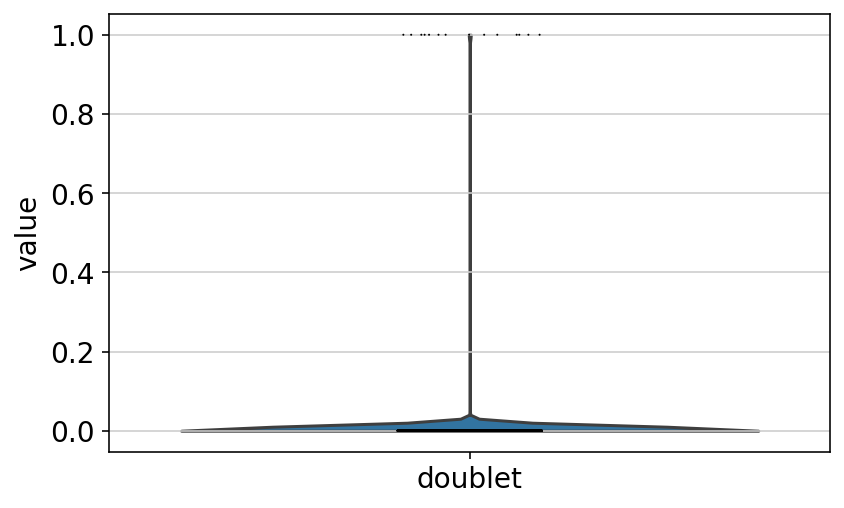

In [ ]:
sc.pl.violin(adata, ["doublet"])

In [ ]:
adata[adata.obs['doublet']<0.5,].write("cov_02_0002_dblt_rm.h5ad")